<a href="https://colab.research.google.com/github/elena-grecu/SSA/blob/main/SSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
alpha=0.7/10
beta=0.5/100
delta=0.2/100
gamma=0.3/10
def get_dXY_dt(X,Y):
    dX_dt = alpha*X - beta*X*Y
    dY_dt= delta*X*Y - gamma*Y
    return dX_dt,dY_dt

import numpy as np
import matplotlib.pyplot as plt

X=10
Y=5
dt=0.1
xL=[]
yL=[]
tL=[]
for i in range(3000):
    if i%10==0:
        xL.append(X)
        yL.append(Y)
        tL.append(i*dt)
    dX_dt,dY_dt=get_dXY_dt(X,Y)
    X+=dX_dt*dt
    Y+=dY_dt*dt


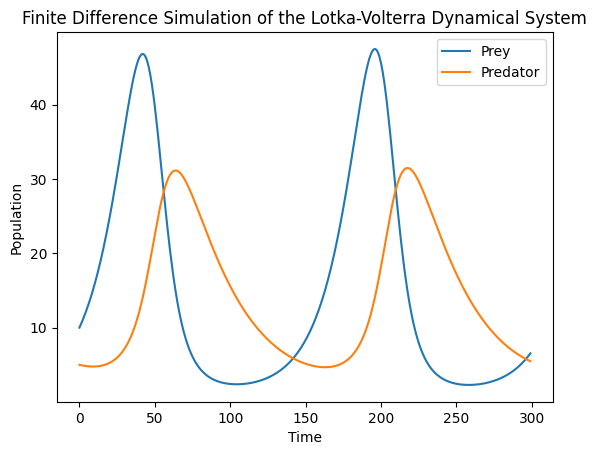

In [ ]:

plt.plot(tL,xL,label='Prey')
plt.plot(tL,yL,label='Predator')
plt.legend()
plt.title('Finite Difference Simulation of the Lotka-Volterra Dynamical System')
plt.xlabel('Time')
plt.ylabel('Population')
plt.savefig('Lotka-Volterra.png')

In [ ]:
scalef=20
alpha=0.7/10
beta=0.5/100
delta=0.2/100
gamma=0.3/10
def get_tau_and_transition(X,Y,alpha,beta,gamma):
    tot_prop=alpha*X/scalef+beta*X*Y/scalef**2+gamma*Y/scalef
    r=np.random.rand()
    tau=-np.log(r)/tot_prop
    r=np.random.rand()
    if r<alpha*X/scalef/tot_prop:
        return 1,tau
    elif r<(alpha*X/scalef+beta*X*Y/scalef**2)/tot_prop:
        return 2,tau
    else:
        return 3,tau

def update_state(X,Y,alpha,beta,gamma,delta):
    r,tau=get_tau_and_transition(X,Y,alpha,beta,gamma)
    if r==1:
        return max(2,X+1),max(2,Y),tau
    elif r==2:
        return max(2,X-1),Y+1*delta/beta,tau
    else:
        return X,max(2,Y-1),tau

In [ ]:
#simulate the system

xL_all=[]
yL_all=[]
tL_all=[]

for iexp in range(10):
  np.random.seed(1960+i*10)
  X=10*scalef
  Y=5*scalef
  xL=[]
  yL=[]
  tL=[]
  t=0
  i=0
  while t<300*scalef:
      if i%100==0:
        xL.append(X/scalef)
        yL.append(Y/scalef)
        tL.append(t/scalef)
      X,Y,tau=update_state(X,Y,alpha,beta,gamma,delta)
    #print(X,Y,tau)
      t+=tau
      i+=1
  xL_all.append(xL)
  yL_all.append(yL)
  tL_all.append(tL)

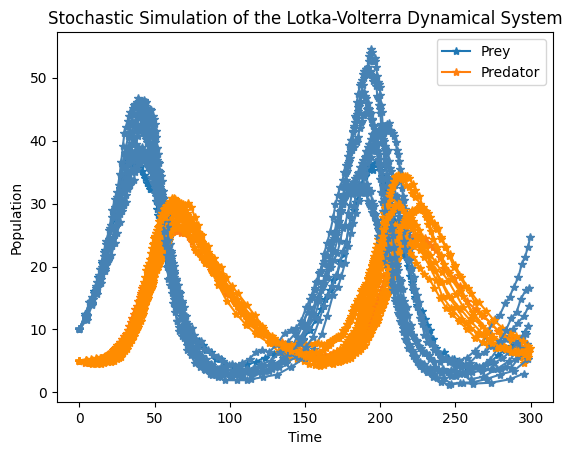

In [ ]:
plt.plot(tL,xL,label='Prey',marker='*')
plt.plot(tL,yL,label='Predator',marker='*')
plt.legend()
plt.title('Stochastic Simulation of the Lotka-Volterra Dynamical System')
plt.xlabel('Time')
plt.ylabel('Population')
for iexp in range(9):
  plt.plot(tL_all[iexp],xL_all[iexp],label='Prey',marker='*',color='steelblue')
  plt.plot(tL_all[iexp],yL_all[iexp],label='Predator',marker='*',color='darkorange')
plt.savefig('Lotka-Volterra_SSA.png')


In [ ]:
def get_tau_and_transition(X,Y,alpha,beta,gamma):
    tot_prop=alpha*X/s_f+beta*X*Y/s_f**2+gamma*Y/s_f
    r=np.random.rand()
    tau=-np.log(r)/tot_prop
    r=np.random.rand()
    if r<alpha*X/s_f/tot_prop:
        return 1,tau
    elif r<(alpha*X/s_f+beta*X*Y/s_f**2)/tot_prop:
        return 2,tau
    else:
        return 3,tau

def update_state(X,Y,alpha,beta,gamma,delta):
    r,tau=get_tau_and_transition(X,Y,alpha,beta,gamma)
    if r==1:
        return max(2,X+1),max(2,Y),tau
    elif r==2:
        return max(2,X-1),Y+1*delta/beta,tau
    else:
        return X,max(2,Y-1),tau